## Netflix Content Strategy Analysis

Content Strategy Analysis means analyzing how content is created, released, distributed, and consumed to achieve specific goals, such as maximizing audience engagement, viewership, brand reach, or revenue.For the task of Netflix Content Strategy Analysis, we need data based on content titles, type (show or movie), genre, language, and release details (date, day of the week, season) to understand timing and content performance. Viewership metrics like hours viewed are also crucial for measuring audience engagement.I found an ideal dataset for this task, which contains data about title, release date, language, content type (show or movie), availability status, and viewership hours of the content on Netflix of all the shows and movies released in 2023. 

Now, let’s get started with the task of Netflix Content Strategy Analysis by importing the necessary Python libraries and the dataset:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
netflix_data = pd.read_csv("netflix_content.csv")

# Display first few rows
print(netflix_data.head())

                                 Title Available Globally? Release Date  \
0            The Night Agent: Season 1                 Yes   2023-03-23   
1            Ginny & Georgia: Season 2                 Yes   2023-01-05   
2   The Glory: Season 1 // 더 글로리: 시즌 1                 Yes   2022-12-30   
3                  Wednesday: Season 1                 Yes   2022-11-23   
4  Queen Charlotte: A Bridgerton Story                 Yes   2023-05-04   

   Hours Viewed Language Indicator Content Type  
0  81,21,00,000            English         Show  
1  66,51,00,000            English         Show  
2  62,28,00,000             Korean         Show  
3  50,77,00,000            English         Show  
4  50,30,00,000            English        Movie  


Let me start with cleaning and preprocessing the “Hours Viewed” column to prepare it for analysis:

In [2]:
netflix_data['Hours Viewed'] = netflix_data['Hours Viewed'].replace(',', '', regex=True).astype(float)

netflix_data[['Title', 'Hours Viewed']].head()

,Title,Hours Viewed
0,The Night Agent: Season 1,812100000.0
1,Ginny & Georgia: Season 2,665100000.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0
3,Wednesday: Season 1,507700000.0
4,Queen Charlotte: A Bridgerton Story,503000000.0


The “Hours Viewed” column has been successfully cleaned and converted to a numeric format. Now, I’ll analyze trends in content type to determine whether shows or movies dominate viewership. Let’s visualize the distribution of total viewership hours between Shows and Movies:

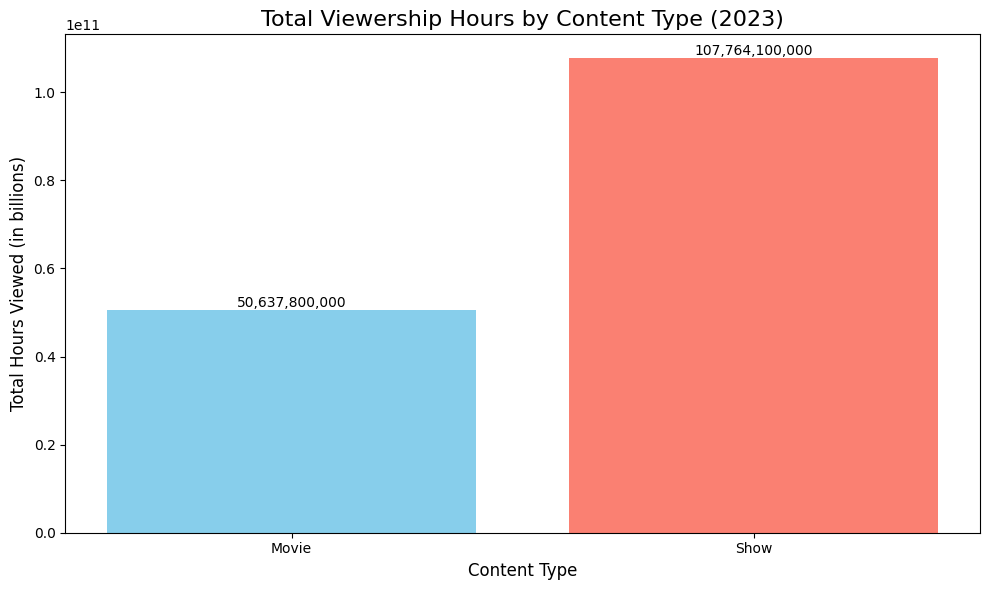

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate viewership hours by content type
content_type_viewership = netflix_data.groupby('Content Type')['Hours Viewed'].sum()

# Bar chart using matplotlib
plt.figure(figsize=(10, 6))
bars = plt.bar(
    content_type_viewership.index,
    content_type_viewership.values,
    color=['skyblue', 'salmon']
)

# Titles and labels
plt.title('Total Viewership Hours by Content Type (2023)', fontsize=16)
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)
plt.xticks(rotation=0)

# Show values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

The visualization indicates that shows dominate the total viewership hours on Netflix in 2023 compared to movies. This suggests that Netflix’s content strategy leans heavily toward shows, as they tend to attract more watch hours overall.

Next, let’s analyze the distribution of viewership across different languages to understand which languages are contributing the most to Netflix’s content consumption:

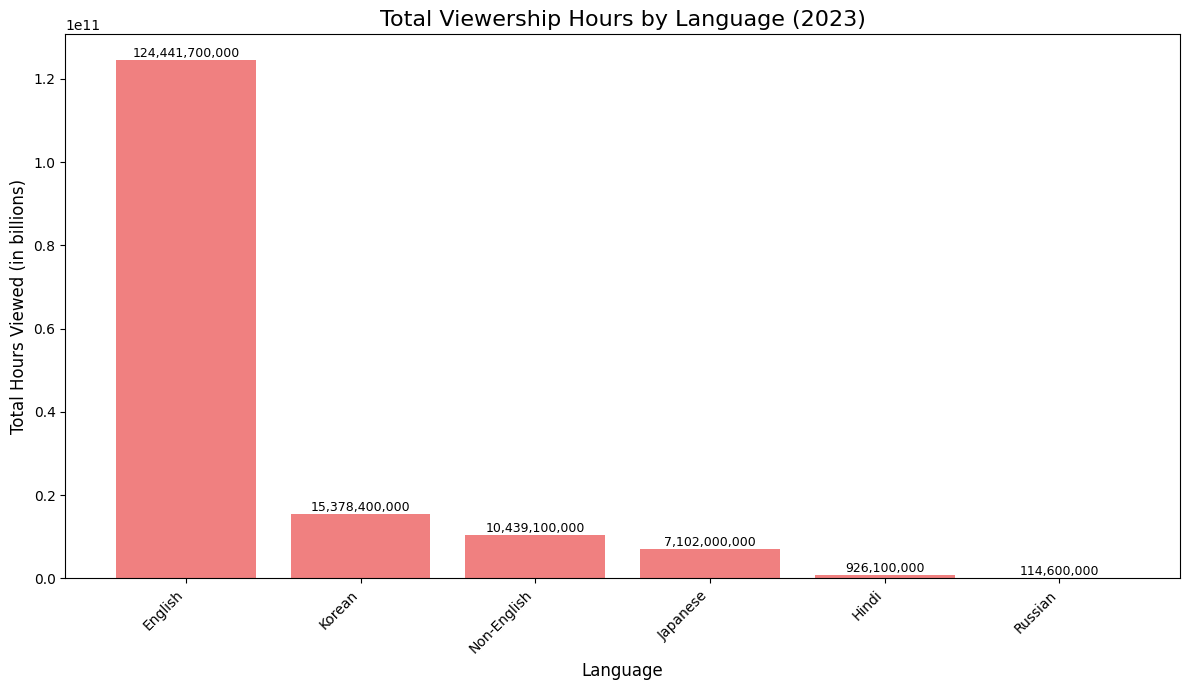

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate and sort viewership hours by language
language_viewership = netflix_data.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(
    language_viewership.index,
    language_viewership.values,
    color='lightcoral'
)

# Add labels and title
plt.title('Total Viewership Hours by Language (2023)', fontsize=16)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

The visualization reveals that English-language content significantly dominates Netflix’s viewership, followed by other languages like Korean. It indicates that Netflix’s primary audience is consuming English content, although non-English shows and movies also have a considerable viewership share, which shows a diverse content strategy.

Next, I’ll analyze how viewership varies based on release dates to identify any trends over time, such as seasonality or patterns around specific months:

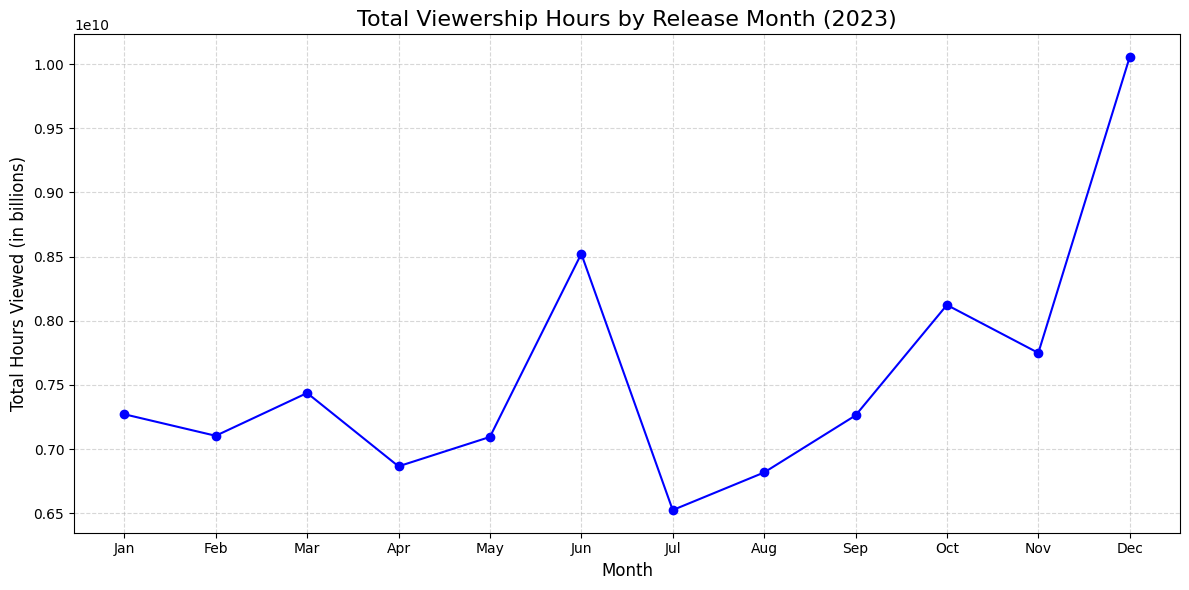

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert release date and extract month
netflix_data['Release Date'] = pd.to_datetime(netflix_data['Release Date'])
netflix_data['Release Month'] = netflix_data['Release Date'].dt.month

# Aggregate viewership by month
monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum()

# Month names for x-axis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_viewership.index, monthly_viewership.values, 
         marker='o', linestyle='-', color='blue')

# Add title and labels
plt.title('Total Viewership Hours by Release Month (2023)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=month_names)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The graph shows the total viewership hours by month, which reveals a notable increase in viewership during June and a sharp rise toward the end of the year in December. It suggests that Netflix experiences spikes in audience engagement during these periods, possibly due to strategic content releases, seasonal trends, or holidays, while the middle months have a steady but lower viewership pattern.

To delve deeper, we can analyze the most successful content (both shows and movies) and understand the specific characteristics, such as genre or theme, that may have contributed to high viewership:

In [6]:
# extract the top 5 titles based on viewership hours
top_5_titles = netflix_data.nlargest(5, 'Hours Viewed')

top_5_titles[['Title', 'Hours Viewed', 'Language Indicator', 'Content Type', 'Release Date']]

,Title,Hours Viewed,Language Indicator,Content Type,Release Date
0,The Night Agent: Season 1,812100000.0,English,Show,2023-03-23
1,Ginny & Georgia: Season 2,665100000.0,English,Show,2023-01-05
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,630200000.0,Korean,Movie,2023-06-17
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0,Korean,Show,2022-12-30
18214,ONE PIECE: Season 1,541900000.0,English,Show,2023-08-31


The top 5 most-viewed titles on Netflix in 2023 are:

1. The Night Agent: Season 1 (English, Show) with 812.1 million hours viewed.
2. Ginny & Georgia: Season 2 (English, Show) with 665.1 million hours viewed.
3. King the Land: Limited Series (Korean, Movie) with 630.2 million hours viewed.
4. The Glory: Season 1 (Korean, Show) with 622.8 million hours viewed.
5. ONE PIECE: Season 1 (English, Show) with 541.9 million hours viewed.

English-language shows dominate the top viewership spots. But, Korean content also has a notable presence in the top titles, which indicates its global popularity.

Now, let’s have a look at the viewership trends by content type:

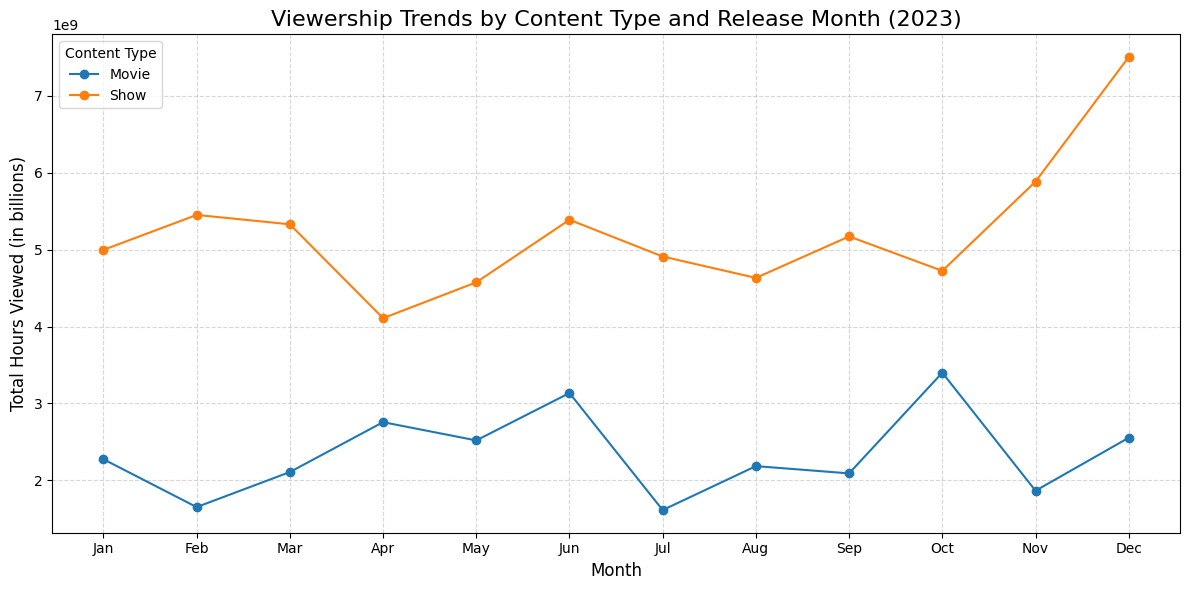

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Create pivot table: release month vs content type
monthly_viewership_by_type = netflix_data.pivot_table(
    index='Release Month',
    columns='Content Type',
    values='Hours Viewed',
    aggfunc='sum'
)

# Month labels for x-axis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting
plt.figure(figsize=(12, 6))

for content_type in monthly_viewership_by_type.columns:
    plt.plot(
        monthly_viewership_by_type.index,
        monthly_viewership_by_type[content_type],
        marker='o',
        label=content_type
    )

# Labels and title
plt.title('Viewership Trends by Content Type and Release Month (2023)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=month_names)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Content Type')

plt.tight_layout()
plt.show()

The graph compares viewership trends between movies and shows throughout 2023. It shows that shows consistently have higher viewership than movies, peaking in December. Movies have more fluctuating viewership, with notable increases in June and October. This indicates that Netflix’s audience engages more with shows across the year, while movie viewership experiences occasional spikes, possibly linked to specific releases or events.

Now, let’s explore the total viewership hours distributed across different release seasons:

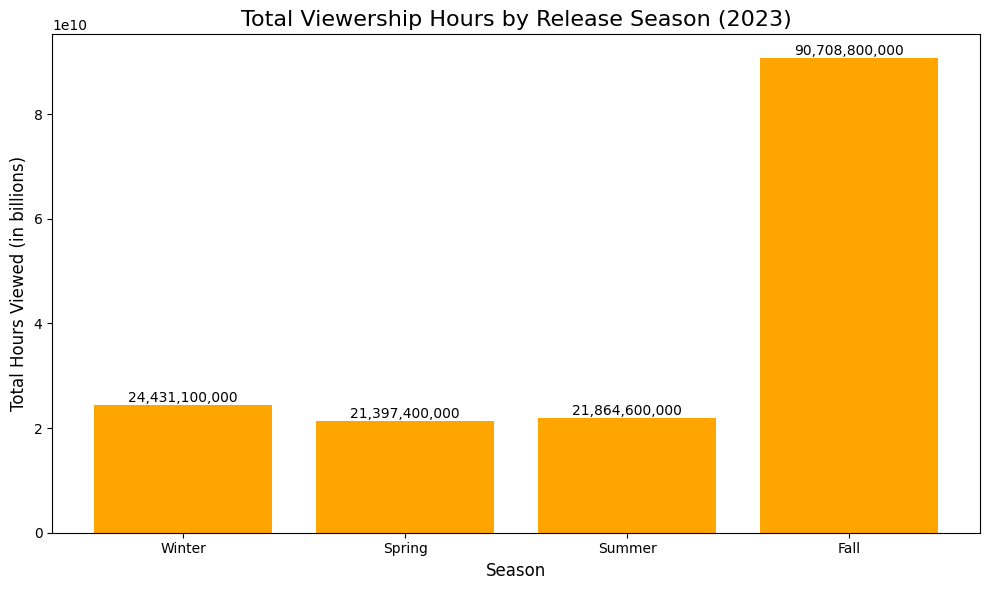

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Define season mapping function
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply season mapping
netflix_data['Release Season'] = netflix_data['Release Month'].apply(get_season)

# Aggregate viewership by season
seasonal_viewership = netflix_data.groupby('Release Season')['Hours Viewed'].sum()

# Reorder seasons
seasons_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_viewership = seasonal_viewership.reindex(seasons_order)

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_viewership.index, seasonal_viewership.values, color='orange')

# Title and labels
plt.title('Total Viewership Hours by Release Season (2023)', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)
plt.xticks(rotation=0)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

The graph indicates that viewership hours peak significantly in the Fall season, with over 80 billion hours viewed, while Winter, Spring, and Summer each have relatively stable and similar viewership around the 20 billion mark. This suggests that Netflix experiences the highest audience engagement during the Fall.

Now, let’s analyze the number of content releases and their viewership hours across months:

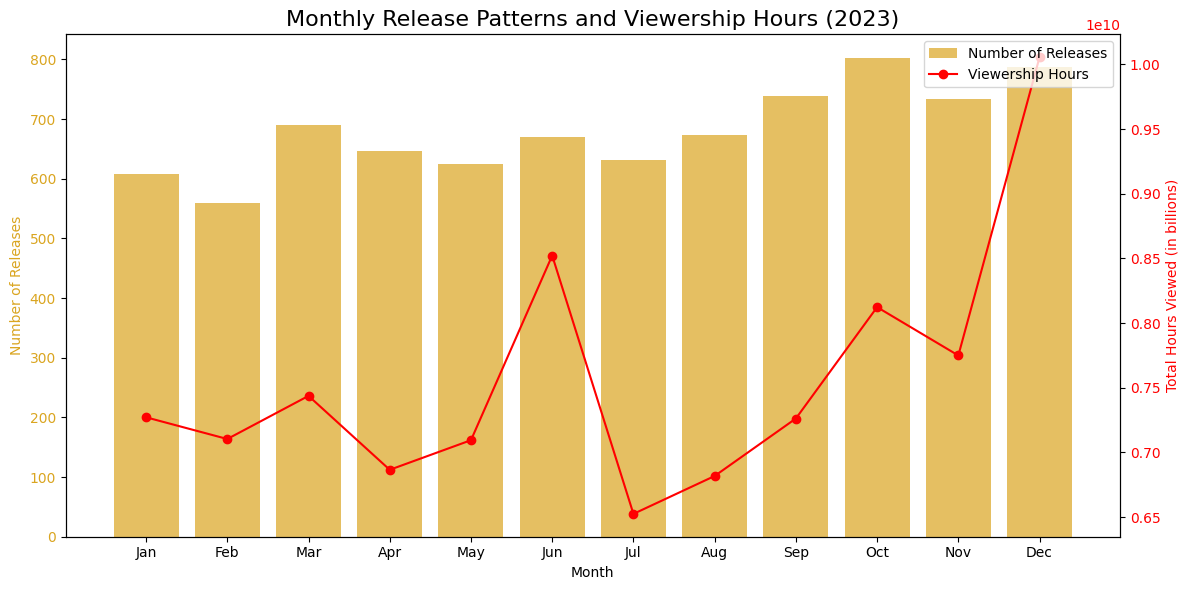

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Monthly release count and viewership aggregation
monthly_releases = netflix_data['Release Month'].value_counts().sort_index()
monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum()

# Month names for x-axis
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for number of releases
bar = ax1.bar(
    monthly_releases.index,
    monthly_releases.values,
    color='goldenrod',
    alpha=0.7,
    label='Number of Releases'
)
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Releases', color='goldenrod')
ax1.tick_params(axis='y', labelcolor='goldenrod')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(months)

# Line chart for viewership hours
ax2 = ax1.twinx()
line = ax2.plot(
    monthly_viewership.index,
    monthly_viewership.values,
    color='red',
    marker='o',
    label='Viewership Hours'
)
ax2.set_ylabel('Total Hours Viewed (in billions)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title('Monthly Release Patterns and Viewership Hours (2023)', fontsize=16)
fig.tight_layout()

# Custom legend
lines_labels = [bar, line[0]]
labels = [l.get_label() for l in lines_labels]
plt.legend(lines_labels, labels, loc='upper right')

plt.show()

While the number of releases is relatively steady throughout the year, viewership hours experience a sharp increase in June and a significant rise in December, despite a stable release count. This indicates that viewership is not solely dependent on the number of releases but influenced by the timing and appeal of specific content during these months.

Next, let’s explore whether Netflix has a preference for releasing content on specific weekdays and how this influences viewership patterns:

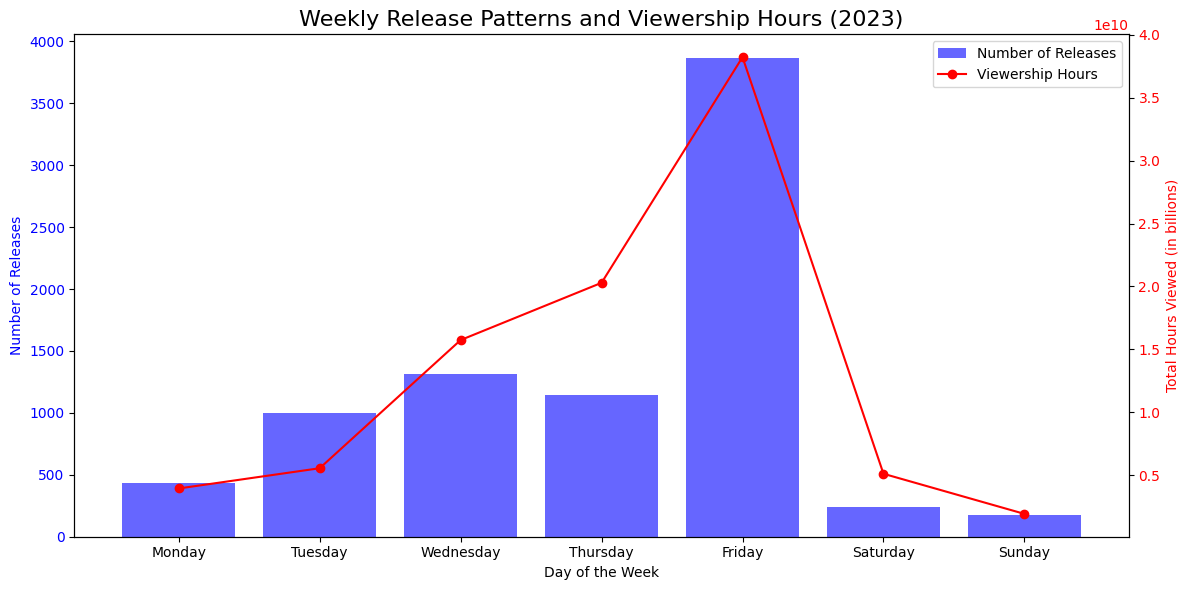

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Add weekday info
netflix_data['Release Day'] = netflix_data['Release Date'].dt.day_name()

# Aggregate
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_releases = netflix_data['Release Day'].value_counts().reindex(weekday_order)
weekday_viewership = netflix_data.groupby('Release Day')['Hours Viewed'].sum().reindex(weekday_order)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot: Number of Releases
bars = ax1.bar(
    weekday_releases.index,
    weekday_releases.values,
    color='blue',
    alpha=0.6,
    label='Number of Releases'
)
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Number of Releases', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line plot: Viewership Hours (second y-axis)
ax2 = ax1.twinx()
line = ax2.plot(
    weekday_viewership.index,
    weekday_viewership.values,
    color='red',
    marker='o',
    label='Viewership Hours'
)
ax2.set_ylabel('Total Hours Viewed (in billions)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title
plt.title('Weekly Release Patterns and Viewership Hours (2023)', fontsize=16)

# Custom legend
lines_labels = [bars, line[0]]
labels = [l.get_label() for l in lines_labels]
plt.legend(lines_labels, labels, loc='upper right')

plt.tight_layout()
plt.show()

The graph highlights that most content releases occur on Fridays, with viewership hours also peaking significantly on that day. This suggests that Netflix strategically releases content toward the weekend to maximize audience engagement. The viewership drops sharply on Saturdays and Sundays, despite some releases, indicating that the audience tends to consume newly released content right at the start of the weekend, which makes Friday the most impactful day for both releases and viewership.

To further understand the strategy, let’s explore specific high-impact dates, such as holidays or major events, and their correlation with content releases:

In [11]:
# define significant holidays and events in 2023
important_dates = [
    '2023-01-01',  # new year's day
    '2023-02-14',  # valentine's ay
    '2023-07-04',  # independence day (US)
    '2023-10-31',  # halloween
    '2023-12-25'   # christmas day
]

# convert to datetime
important_dates = pd.to_datetime(important_dates)

# check for content releases close to these significant holidays (within a 3-day window)
holiday_releases = netflix_data[netflix_data['Release Date'].apply(
    lambda x: any((x - date).days in range(-3, 4) for date in important_dates)
)]

# aggregate viewership hours for releases near significant holidays
holiday_viewership = holiday_releases.groupby('Release Date')['Hours Viewed'].sum()

holiday_releases[['Title', 'Release Date', 'Hours Viewed']]

,Title,Release Date,Hours Viewed
2,The Glory: Season 1 // 더 글로리: 시즌 1,2022-12-30,622800000.0
6,La Reina del Sur: Season 3,2022-12-30,429600000.0
11,Kaleidoscope: Limited Series,2023-01-01,252500000.0
29,Perfect Match: Season 1,2023-02-14,176800000.0
124,Lady Voyeur: Limited Series // Olhar Indiscret...,2022-12-31,86000000.0
...,...,...,...
22324,The Romantics: Limited Series,2023-02-14,1000000.0
22327,Aggretsuko: Season 5 // アグレッシブ烈子: シーズン5,2023-02-16,900000.0
22966,The Lying Life of Adults: Limited Series // La...,2023-01-04,900000.0
22985,Community Squad: Season 1 // División Palermo:...,2023-02-17,800000.0


The data reveals that Netflix has strategically released content around key holidays and events. Some of the significant releases include:

1. New Year’s Period: The Glory: Season 1, La Reina del Sur: Season 3, and Kaleidoscope: Limited Series were released close to New Year’s Day, resulting in high viewership.
2. Valentine’s Day: Perfect Match: Season 1 and The Romantics: Limited Series were released on February 14th, which align with a romantic theme and capitalize on the holiday’s sentiment.

So, the content strategy of Netflix revolves around maximizing viewership through targeted release timing and content variety. Shows consistently outperform movies in viewership, with significant spikes in December and June, indicating strategic releases around these periods. The Fall season stands out as the peak time for audience engagement. Most content is released on Fridays, which aims to capture viewers right before the weekend, and viewership aligns strongly with this release pattern. While the number of releases is steady throughout the year, viewership varies, which suggests a focus on high-impact titles and optimal release timing over sheer volume.